<a href="https://colab.research.google.com/github/sagihaider/EEG_Deep/blob/master/main_Single_Trial_Classification_NSL_2Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sagihaider/EEG_Deep.git

Cloning into 'EEG_Deep'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 316 (delta 0), reused 0 (delta 0), pack-reused 313
Receiving objects: 100% (316/316), 1.68 GiB | 38.48 MiB/s, done.
Resolving deltas: 100% (128/128), done.
Checking out files: 100% (93/93), done.


In [33]:
import scipy.io as spio
import numpy as np
from importlib.machinery import SourceFileLoader

# EEGNet-specific imports
from EEG_Deep.EEGModels import EEGNet, ShallowConvNet, DeepConvNet, EEGNet_Patient
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
K.set_image_data_format('channels_first')

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# tools for plotting confusion matrices
from matplotlib import pyplot as plt
from scipy.signal import butter, lfilter

!pip install neural_structured_learning
import tensorflow as tf
import neural_structured_learning as nsl

     |████████████████████████████████| 112kB 9.0MB/s 


In [0]:
# Band-pass Filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y


EEG_Deep/Data2A/Eopched_S01T.mat
(100, 15, 4096)
(100,)
(70, 15, 1536)
(70,)
(30, 15, 1536)
(30,)
X_train shape: (70, 1, 15, 1536)
70 train samples
30 val samples
EEG_Deep/Data2A/Eopched_S01E.mat
(60, 15, 4096)
(60,)
(60, 15, 1536)
(60,)
X_train shape: (60, 1, 15, 1536)
60 test samples
Train on 3 steps, validate on 1 steps
Epoch 1/500
3/3 [==============================] - 0s 129ms/step - loss: 0.6827 - categorical_crossentropy: 0.6827 - categorical_accuracy: 0.5714 - val_loss: 0.6914 - val_categorical_crossentropy: 0.6914 - val_categorical_accuracy: 0.6667
Epoch 2/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6539 - categorical_crossentropy: 0.6539 - categorical_accuracy: 0.6000 - val_loss: 0.6912 - val_categorical_crossentropy: 0.6912 - val_categorical_accuracy: 0.6667
Epoch 3/500
3/3 [==============================] - 0s 25ms/step - loss: 0.6253 - categorical_crossentropy: 0.6253 - categorical_accuracy: 0.7286 - val_loss: 0.6909 - val_categorical_crossentropy: 0.

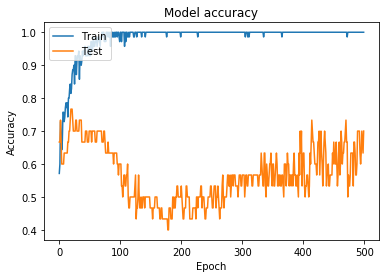


# Evaluate on test data
2/2 [==============================] - 0s 44ms/step - loss: 0.5810 - categorical_crossentropy: 0.5810 - categorical_accuracy: 0.7000
test loss, test acc: [0.5809871703386307, 0.58098716, 0.7]
EEG_Deep/Data2A/Eopched_S02T.mat
(100, 15, 4096)
(100,)
(70, 15, 1536)
(70,)
(30, 15, 1536)
(30,)
X_train shape: (70, 1, 15, 1536)
70 train samples
30 val samples
EEG_Deep/Data2A/Eopched_S02E.mat
(60, 15, 4096)
(60,)
(60, 15, 1536)
(60,)
X_train shape: (60, 1, 15, 1536)
60 test samples
Train on 3 steps, validate on 1 steps
Epoch 1/500
3/3 [==============================] - 0s 137ms/step - loss: 0.6768 - categorical_crossentropy: 0.6768 - categorical_accuracy: 0.4571 - val_loss: 0.6947 - val_categorical_crossentropy: 0.6947 - val_categorical_accuracy: 0.5333
Epoch 2/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6578 - categorical_crossentropy: 0.6578 - categorical_accuracy: 0.7000 - val_loss: 0.6955 - val_categorical_crossentropy: 0.6955 - val_categorica

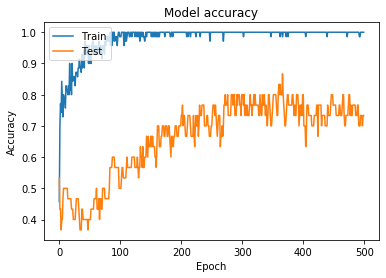


# Evaluate on test data
2/2 [==============================] - 0s 53ms/step - loss: 0.3083 - categorical_crossentropy: 0.3083 - categorical_accuracy: 0.8167
test loss, test acc: [0.3083057552576065, 0.30830574, 0.81666666]
EEG_Deep/Data2A/Eopched_S03T.mat
(100, 15, 4096)
(100,)
(70, 15, 1536)
(70,)
(30, 15, 1536)
(30,)
X_train shape: (70, 1, 15, 1536)
70 train samples
30 val samples
EEG_Deep/Data2A/Eopched_S03E.mat
(60, 15, 4096)
(60,)
(60, 15, 1536)
(60,)
X_train shape: (60, 1, 15, 1536)
60 test samples
Train on 3 steps, validate on 1 steps
Epoch 1/500
3/3 [==============================] - 0s 139ms/step - loss: 0.7078 - categorical_crossentropy: 0.7078 - categorical_accuracy: 0.5286 - val_loss: 0.6966 - val_categorical_crossentropy: 0.6966 - val_categorical_accuracy: 0.5000
Epoch 2/500
3/3 [==============================] - 0s 24ms/step - loss: 0.6575 - categorical_crossentropy: 0.6575 - categorical_accuracy: 0.5714 - val_loss: 0.6944 - val_categorical_crossentropy: 0.6944 - val_cat

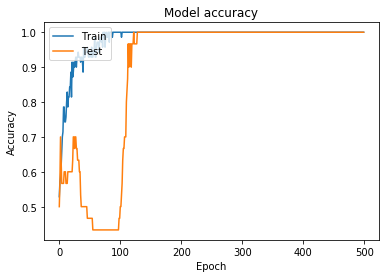


# Evaluate on test data
2/2 [==============================] - 0s 47ms/step - loss: 0.0447 - categorical_crossentropy: 0.0447 - categorical_accuracy: 0.9833
test loss, test acc: [0.044670913834124804, 0.044670913, 0.98333335]
EEG_Deep/Data2A/Eopched_S04T.mat
(100, 15, 4096)
(100,)
(70, 15, 1536)
(70,)
(30, 15, 1536)
(30,)
X_train shape: (70, 1, 15, 1536)
70 train samples
30 val samples
EEG_Deep/Data2A/Eopched_S04E.mat
(60, 15, 4096)
(60,)
(60, 15, 1536)
(60,)
X_train shape: (60, 1, 15, 1536)
60 test samples
Train on 3 steps, validate on 1 steps
Epoch 1/500
3/3 [==============================] - 0s 143ms/step - loss: 0.6972 - categorical_crossentropy: 0.6972 - categorical_accuracy: 0.4571 - val_loss: 0.6955 - val_categorical_crossentropy: 0.6955 - val_categorical_accuracy: 0.4000
Epoch 2/500
3/3 [==============================] - 0s 24ms/step - loss: 0.6378 - categorical_crossentropy: 0.6378 - categorical_accuracy: 0.5429 - val_loss: 0.6940 - val_categorical_crossentropy: 0.6940 - val_

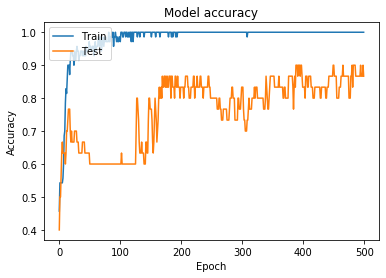


# Evaluate on test data
2/2 [==============================] - 0s 54ms/step - loss: 0.2328 - categorical_crossentropy: 0.2328 - categorical_accuracy: 0.9167
test loss, test acc: [0.2327725812792778, 0.23277259, 0.9166667]
EEG_Deep/Data2A/Eopched_S05T.mat
(100, 15, 4096)
(100,)
(70, 15, 1536)
(70,)
(30, 15, 1536)
(30,)
X_train shape: (70, 1, 15, 1536)
70 train samples
30 val samples
EEG_Deep/Data2A/Eopched_S05E.mat
(60, 15, 4096)
(60,)
(60, 15, 1536)
(60,)
X_train shape: (60, 1, 15, 1536)
60 test samples
Train on 3 steps, validate on 1 steps
Epoch 1/500
3/3 [==============================] - 0s 150ms/step - loss: 0.7489 - categorical_crossentropy: 0.7489 - categorical_accuracy: 0.3714 - val_loss: 0.6958 - val_categorical_crossentropy: 0.6958 - val_categorical_accuracy: 0.4333
Epoch 2/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6803 - categorical_crossentropy: 0.6803 - categorical_accuracy: 0.5143 - val_loss: 0.6971 - val_categorical_crossentropy: 0.6971 - val_cate

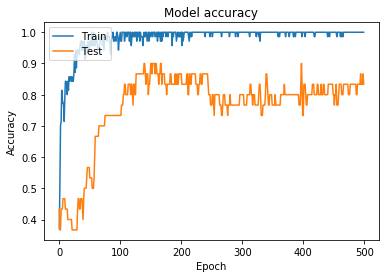


# Evaluate on test data
2/2 [==============================] - 0s 51ms/step - loss: 1.1236 - categorical_crossentropy: 1.1236 - categorical_accuracy: 0.4833
test loss, test acc: [1.123586356639862, 1.1235864, 0.48333332]
EEG_Deep/Data2A/Eopched_S06T.mat
(100, 15, 4096)
(100,)
(70, 15, 1536)
(70,)
(30, 15, 1536)
(30,)
X_train shape: (70, 1, 15, 1536)
70 train samples
30 val samples
EEG_Deep/Data2A/Eopched_S06E.mat
(60, 15, 4096)
(60,)
(60, 15, 1536)
(60,)
X_train shape: (60, 1, 15, 1536)
60 test samples
Train on 3 steps, validate on 1 steps
Epoch 1/500
3/3 [==============================] - 0s 135ms/step - loss: 0.7176 - categorical_crossentropy: 0.7176 - categorical_accuracy: 0.5143 - val_loss: 0.6907 - val_categorical_crossentropy: 0.6907 - val_categorical_accuracy: 0.6667
Epoch 2/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6695 - categorical_crossentropy: 0.6695 - categorical_accuracy: 0.5714 - val_loss: 0.6909 - val_categorical_crossentropy: 0.6909 - val_categ

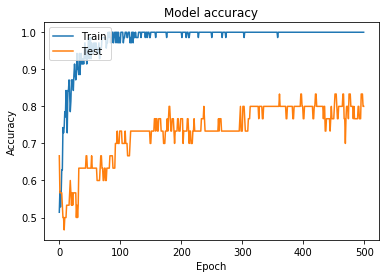


# Evaluate on test data
2/2 [==============================] - 0s 45ms/step - loss: 0.4642 - categorical_crossentropy: 0.4642 - categorical_accuracy: 0.8000
test loss, test acc: [0.4642421007156372, 0.4642421, 0.8]
EEG_Deep/Data2A/Eopched_S07T.mat
(100, 15, 4096)
(100,)
(70, 15, 1536)
(70,)
(30, 15, 1536)
(30,)
X_train shape: (70, 1, 15, 1536)
70 train samples
30 val samples
EEG_Deep/Data2A/Eopched_S07E.mat
(60, 15, 4096)
(60,)
(60, 15, 1536)
(60,)
X_train shape: (60, 1, 15, 1536)
60 test samples
Train on 3 steps, validate on 1 steps
Epoch 1/500
3/3 [==============================] - 0s 133ms/step - loss: 0.7105 - categorical_crossentropy: 0.7105 - categorical_accuracy: 0.5000 - val_loss: 0.6902 - val_categorical_crossentropy: 0.6902 - val_categorical_accuracy: 0.5333
Epoch 2/500
3/3 [==============================] - 0s 24ms/step - loss: 0.6748 - categorical_crossentropy: 0.6748 - categorical_accuracy: 0.5571 - val_loss: 0.6896 - val_categorical_crossentropy: 0.6896 - val_categorical

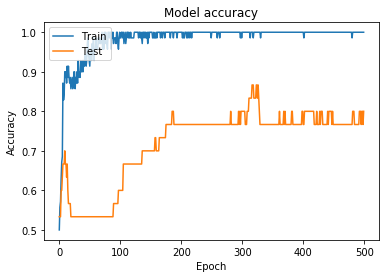


# Evaluate on test data
2/2 [==============================] - 0s 44ms/step - loss: 0.3306 - categorical_crossentropy: 0.3306 - categorical_accuracy: 0.8667
test loss, test acc: [0.330583393573761, 0.3305834, 0.8666667]
EEG_Deep/Data2A/Eopched_S08T.mat
(100, 15, 4096)
(100,)
(70, 15, 1536)
(70,)
(30, 15, 1536)
(30,)
X_train shape: (70, 1, 15, 1536)
70 train samples
30 val samples
EEG_Deep/Data2A/Eopched_S08E.mat
(60, 15, 4096)
(60,)
(60, 15, 1536)
(60,)
X_train shape: (60, 1, 15, 1536)
60 test samples
Train on 3 steps, validate on 1 steps
Epoch 1/500
3/3 [==============================] - 0s 133ms/step - loss: 0.7195 - categorical_crossentropy: 0.7195 - categorical_accuracy: 0.5714 - val_loss: 0.6931 - val_categorical_crossentropy: 0.6931 - val_categorical_accuracy: 0.4667
Epoch 2/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6606 - categorical_crossentropy: 0.6606 - categorical_accuracy: 0.5286 - val_loss: 0.6933 - val_categorical_crossentropy: 0.6933 - val_catego

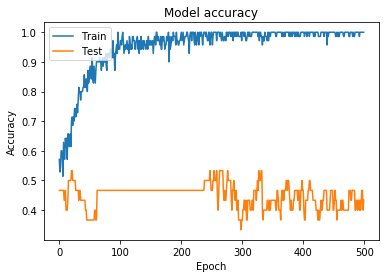


# Evaluate on test data
2/2 [==============================] - 0s 45ms/step - loss: 0.7440 - categorical_crossentropy: 0.7440 - categorical_accuracy: 0.4500
test loss, test acc: [0.7440028786659241, 0.7440029, 0.45]
EEG_Deep/Data2A/Eopched_S09T.mat
(100, 15, 4096)
(100,)
(70, 15, 1536)
(70,)
(30, 15, 1536)
(30,)
X_train shape: (70, 1, 15, 1536)
70 train samples
30 val samples
EEG_Deep/Data2A/Eopched_S09E.mat
(60, 15, 4096)
(60,)
(60, 15, 1536)
(60,)
X_train shape: (60, 1, 15, 1536)
60 test samples
Train on 3 steps, validate on 1 steps
Epoch 1/500
3/3 [==============================] - 0s 125ms/step - loss: 0.7006 - categorical_crossentropy: 0.7006 - categorical_accuracy: 0.5429 - val_loss: 0.6929 - val_categorical_crossentropy: 0.6929 - val_categorical_accuracy: 0.5000
Epoch 2/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6553 - categorical_crossentropy: 0.6553 - categorical_accuracy: 0.7143 - val_loss: 0.6921 - val_categorical_crossentropy: 0.6921 - val_categorica

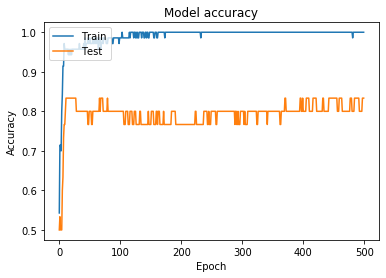


# Evaluate on test data
2/2 [==============================] - 0s 43ms/step - loss: 0.1092 - categorical_crossentropy: 0.1092 - categorical_accuracy: 0.9667
test loss, test acc: [0.109239112585783, 0.10923912, 0.96666664]
EEG_Deep/Data2A/Eopched_S010T.mat
(100, 15, 4096)
(100,)
(70, 15, 1536)
(70,)
(30, 15, 1536)
(30,)
X_train shape: (70, 1, 15, 1536)
70 train samples
30 val samples
EEG_Deep/Data2A/Eopched_S010E.mat
(60, 15, 4096)
(60,)
(60, 15, 1536)
(60,)
X_train shape: (60, 1, 15, 1536)
60 test samples
Train on 3 steps, validate on 1 steps
Epoch 1/500
3/3 [==============================] - 0s 143ms/step - loss: 0.7308 - categorical_crossentropy: 0.7308 - categorical_accuracy: 0.4429 - val_loss: 0.6904 - val_categorical_crossentropy: 0.6904 - val_categorical_accuracy: 0.5667
Epoch 2/500
3/3 [==============================] - 0s 26ms/step - loss: 0.6587 - categorical_crossentropy: 0.6587 - categorical_accuracy: 0.7143 - val_loss: 0.6911 - val_categorical_crossentropy: 0.6911 - val_ca

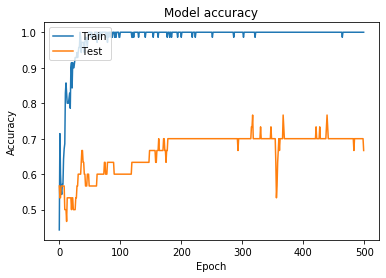


# Evaluate on test data
2/2 [==============================] - 0s 47ms/step - loss: 1.3023 - categorical_crossentropy: 1.3023 - categorical_accuracy: 0.5667
test loss, test acc: [1.302253097295761, 1.3022531, 0.56666666]
EEG_Deep/Data2A/Eopched_S011T.mat
(100, 15, 4096)
(100,)
(70, 15, 1536)
(70,)
(30, 15, 1536)
(30,)
X_train shape: (70, 1, 15, 1536)
70 train samples
30 val samples
EEG_Deep/Data2A/Eopched_S011E.mat
(60, 15, 4096)
(60,)
(60, 15, 1536)
(60,)
X_train shape: (60, 1, 15, 1536)
60 test samples
Train on 3 steps, validate on 1 steps
Epoch 1/500
3/3 [==============================] - 0s 141ms/step - loss: 0.6620 - categorical_crossentropy: 0.6620 - categorical_accuracy: 0.6286 - val_loss: 0.6937 - val_categorical_crossentropy: 0.6937 - val_categorical_accuracy: 0.3667
Epoch 2/500
3/3 [==============================] - 0s 27ms/step - loss: 0.6493 - categorical_crossentropy: 0.6493 - categorical_accuracy: 0.7286 - val_loss: 0.6925 - val_categorical_crossentropy: 0.6925 - val_cat

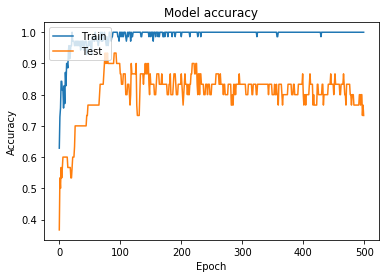


# Evaluate on test data
2/2 [==============================] - 0s 45ms/step - loss: 0.6866 - categorical_crossentropy: 0.6866 - categorical_accuracy: 0.8000
test loss, test acc: [0.6865846961736679, 0.6865847, 0.8]
EEG_Deep/Data2A/Eopched_S012T.mat
(100, 15, 4096)
(100,)
(70, 15, 1536)
(70,)
(30, 15, 1536)
(30,)
X_train shape: (70, 1, 15, 1536)
70 train samples
30 val samples
EEG_Deep/Data2A/Eopched_S012E.mat
(60, 15, 4096)
(60,)
(60, 15, 1536)
(60,)
X_train shape: (60, 1, 15, 1536)
60 test samples
Train on 3 steps, validate on 1 steps
Epoch 1/500
3/3 [==============================] - 0s 133ms/step - loss: 0.6891 - categorical_crossentropy: 0.6891 - categorical_accuracy: 0.4714 - val_loss: 0.6955 - val_categorical_crossentropy: 0.6955 - val_categorical_accuracy: 0.4333
Epoch 2/500
3/3 [==============================] - 0s 25ms/step - loss: 0.6571 - categorical_crossentropy: 0.6571 - categorical_accuracy: 0.7714 - val_loss: 0.6956 - val_categorical_crossentropy: 0.6956 - val_categoric

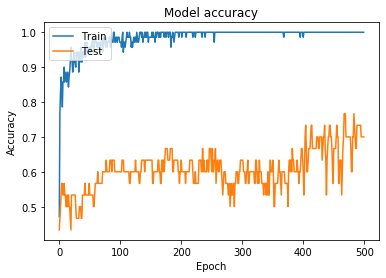


# Evaluate on test data
2/2 [==============================] - 0s 44ms/step - loss: 0.8247 - categorical_crossentropy: 0.8247 - categorical_accuracy: 0.5833
test loss, test acc: [0.8246742188930511, 0.82467425, 0.5833333]
EEG_Deep/Data2A/Eopched_S013T.mat
(100, 15, 4096)
(100,)
(70, 15, 1536)
(70,)
(30, 15, 1536)
(30,)
X_train shape: (70, 1, 15, 1536)
70 train samples
30 val samples
EEG_Deep/Data2A/Eopched_S013E.mat
(60, 15, 4096)
(60,)
(60, 15, 1536)
(60,)
X_train shape: (60, 1, 15, 1536)
60 test samples
Train on 3 steps, validate on 1 steps
Epoch 1/500
3/3 [==============================] - 0s 133ms/step - loss: 0.7172 - categorical_crossentropy: 0.7172 - categorical_accuracy: 0.5571 - val_loss: 0.6896 - val_categorical_crossentropy: 0.6896 - val_categorical_accuracy: 0.6333
Epoch 2/500
3/3 [==============================] - 0s 24ms/step - loss: 0.6553 - categorical_crossentropy: 0.6553 - categorical_accuracy: 0.7000 - val_loss: 0.6887 - val_categorical_crossentropy: 0.6887 - val_ca

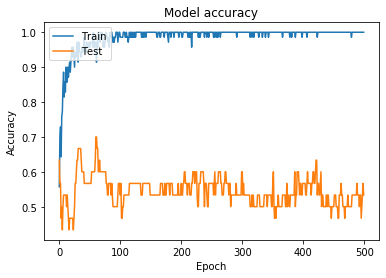


# Evaluate on test data
2/2 [==============================] - 0s 42ms/step - loss: 0.9902 - categorical_crossentropy: 0.9902 - categorical_accuracy: 0.5500
test loss, test acc: [0.990197092294693, 0.99019706, 0.55]
EEG_Deep/Data2A/Eopched_S014T.mat
(100, 15, 4096)
(100,)
(70, 15, 1536)
(70,)
(30, 15, 1536)
(30,)
X_train shape: (70, 1, 15, 1536)
70 train samples
30 val samples
EEG_Deep/Data2A/Eopched_S014E.mat
(60, 15, 4096)
(60,)
(60, 15, 1536)
(60,)
X_train shape: (60, 1, 15, 1536)
60 test samples
Train on 3 steps, validate on 1 steps
Epoch 1/500
3/3 [==============================] - 0s 123ms/step - loss: 0.7538 - categorical_crossentropy: 0.7538 - categorical_accuracy: 0.5000 - val_loss: 0.7005 - val_categorical_crossentropy: 0.7005 - val_categorical_accuracy: 0.4000
Epoch 2/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6392 - categorical_crossentropy: 0.6392 - categorical_accuracy: 0.6429 - val_loss: 0.7035 - val_categorical_crossentropy: 0.7035 - val_categori

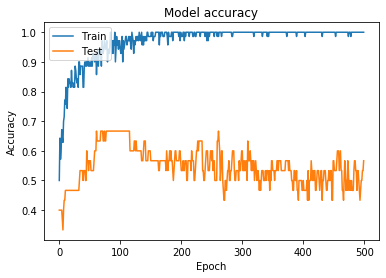


# Evaluate on test data
2/2 [==============================] - 0s 45ms/step - loss: 8.7886 - categorical_crossentropy: 8.7886 - categorical_accuracy: 0.5500
test loss, test acc: [8.788630276918411, 8.7886305, 0.55]
[[0.58098717 0.58098716 0.69999999]
 [0.30830576 0.30830574 0.81666666]
 [0.04467091 0.04467091 0.98333335]
 [0.23277258 0.23277259 0.91666669]
 [1.12358636 1.12358642 0.48333332]
 [0.4642421  0.4642421  0.80000001]
 [0.33058339 0.33058339 0.86666667]
 [0.74400288 0.74400288 0.44999999]
 [0.10923911 0.10923912 0.96666664]
 [1.3022531  1.30225313 0.56666666]
 [0.6865847  0.68658471 0.80000001]
 [0.82467422 0.82467425 0.58333331]
 [0.99019709 0.99019706 0.55000001]
 [8.78863028 8.78863049 0.55000001]]


<Figure size 432x288 with 0 Axes>

In [51]:
from numpy import zeros
K.clear_session()
cols = 3
rows = 14
acc_all = zeros([rows, cols])
X_tr = np.empty([100, 15, 4096])
X_ts = np.empty([60, 15, 4096])


for x in range(1,15):
  fName = 'EEG_Deep/Data2A/Eopched_S0' + str(x) + 'T.mat'  # Load Data
  print(fName)
  mat = spio.loadmat(fName)
  r_X_tr = mat['cleanRawEEGData']
  y_tr = mat['cleanClassLabels']
  y_tr = y_tr.flatten() 
  
  print(np.shape(r_X_tr))
  print(np.shape(y_tr))

  for t in range(r_X_tr.shape[0]):
    tril = r_X_tr[t,:,:]
    # tril = tril.transpose()
    tril_filtered = butter_bandpass_filter(tril, 
                                              lowcut=4, 
                                              highcut=40, 
                                              fs=250,
                                              order=4)
    # tril_filtered = tril_filtered.transpose()
    X_tr[t,:,:] = tril_filtered 
    
  # split data of each subject in training and validation
  X_train      = X_tr[0:70,:,1536:3072]
  Y_train      = y_tr[0:70]
  X_val       = X_tr[70:,:,1536:3072]
  Y_val       = y_tr[70:]

  print(np.shape(X_train))
  print(np.shape(Y_train))
  print(np.shape(X_val))
  print(np.shape(Y_val))
  
  # convert labels to one-hot encodings.
  Y_train      = np_utils.to_categorical(Y_train-1)
  Y_val       = np_utils.to_categorical(Y_val-1)

  kernels, chans, samples = 1, 15, 1536
  # convert data to NCHW (trials, kernels, channels, samples) format. Data 
  # contains 22 channels and 500 time-points. Set the number of kernels to 1.
  X_train      = X_train.reshape(X_train.shape[0], kernels, chans, samples)
  X_val       = X_val.reshape(X_val.shape[0], kernels, chans, samples)
   
  print('X_train shape:', X_train.shape)
  print(X_train.shape[0], 'train samples')
  print(X_val.shape[0], 'val samples')

  fName = 'EEG_Deep/Data2A/Eopched_S0' + str(x) + 'E.mat'  # Load Data
  print(fName)
  mat = spio.loadmat(fName)
  r_X_ts = mat['cleanRawEEGData']
  y_ts = mat['cleanClassLabels']
  y_ts = y_ts.flatten() 

  print(np.shape(r_X_ts))
  print(np.shape(y_ts))

  for t in range(r_X_ts.shape[0]):
    tril = r_X_ts[t,:,:]
    # tril = tril.transpose()
    tril_filtered = butter_bandpass_filter(tril, 
                                              lowcut=4, 
                                              highcut=40, 
                                              fs=250,
                                              order=4)
    # tril_filtered = tril_filtered.transpose()
    X_ts[t,:,:] = tril_filtered 

  X_test      = X_ts[:,:,1536:3072]
  Y_test      = y_ts[:]
  print(np.shape(X_test))
  print(np.shape(Y_test))

  #convert labels to one-hot encodings.
  Y_test      = np_utils.to_categorical(Y_test-1)

  # convert data to NCHW (trials, kernels, channels, samples) format. Data 
  # contains 22 channels and 500 time-points. Set the number of kernels to 1.
  X_test      = X_test.reshape(X_test.shape[0], kernels, chans, samples)

  print('X_train shape:', X_test.shape)
  print(X_test.shape[0], 'test samples')

   # configure the EEGNet-8,2,16 model with kernel length of 32 samples (other 
  # model configurations may do better, but this is a good starting point)
  model = EEGNet(nb_classes = 2, Chans = 15, Samples = 1536, 
                 dropoutRate = 0.25, kernLength = 25, F1 = 8, 
                 D = 2, F2 = 16, norm_rate = 0.25, dropoutType = 'Dropout')

  adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.5, adv_grad_norm='infinity')
  adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)
  
  # compile the model and set the optimizers
  adv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
  batch_size = 32

  X_train = tf.cast(X_train, tf.float32)
  X_test = tf.cast(X_test, tf.float32)
  X_val = tf.cast(X_val, tf.float32)

  train_data = tf.data.Dataset.from_tensor_slices({'input': X_train, 'label': Y_train}).batch(batch_size)
  val_data = tf.data.Dataset.from_tensor_slices({'input': X_val, 'label': Y_val}).batch(batch_size)
  test_data = tf.data.Dataset.from_tensor_slices({'input': X_test, 'label': Y_test}).batch(batch_size)

  val_steps = X_val.shape[0] // batch_size
  
  history = adv_model.fit(train_data, validation_data=val_data, validation_steps=None, epochs=500, verbose=1)

  # Plot training & validation accuracy values
  plt.plot(history.history['categorical_accuracy'])
  plt.plot(history.history['val_categorical_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  figName = 'Accuracy_A0' + str(x) + '.png'  
  plt.savefig(figName)

  print('\n# Evaluate on test data')
  results = adv_model.evaluate(test_data)
  print('test loss, test acc:', results)

  acc_all[x - 1, 0] = results[0]
  acc_all[x - 1, 1] = results[1]
  acc_all[x - 1, 2] = results[2]

  from keras import backend as K 
  # Do some code, e.g. train and save model
  K.clear_session()

print(acc_all)

In [0]:
import pandas as pd
df_accl_all = pd.DataFrame({'loss': acc_all[:, 0], 'categorical_crossentropy': acc_all[:, 1],'categorical_accuracy': acc_all[:, 2]})
df_accl_all.to_csv (r'df_accl_all.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path
